# Projet 6 - Classification supervisée images via CNN Transfer Learning

## Préparation du dataset

In [1]:
# module manipulation data et visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuration jupyter lab, affichage graphiques directement dans notebook
%matplotlib inline

#imports divers

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from PIL import Image
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import decomposition
from sklearn import manifold
import time
from sklearn.preprocessing import LabelEncoder
import numpy as np



# module gestion fichiers répertoires
import os
from os import listdir
from glob import glob

# modules prétraitement données / évaluation modèles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve

# modules deep learning (tensor flow et keras)
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-06-07 09:36:33.231411: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 09:36:33.975713: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  0


2024-06-07 09:36:34.374942: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-07 09:36:34.416428: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [2]:
#import du fichier dans un dataframe pandas
data = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")

In [3]:
## vérification chemin fichier
import os

path = "data/Images/"


# Vérification des chemins
print("Chemin : ", os.path.exists(path))

# Affichage du contenu des répertoires
print("Contenu du répertoire : ", os.listdir(path))


Chemin :  True
Contenu du répertoire :  ['a67d4b8df18ac476cd1b0bbd80e589a4.jpg', 'd1e18b4a3aafb0040da2111c8b8ce2e5.jpg', '0d3e1dc0d38be59e9927e47f152e48aa.jpg', '3dfdf277bccb74532c0387adfed2897d.jpg', '5e52d6ce133e5307814f9f3eedc5806d.jpg', '640fd08bb3ba538d67a5c0c2c61a5c4c.jpg', 'c9c4720bca91b8ce27d8190a7c4c139c.jpg', '4735953b9c8504eb327675a14c6c33dd.jpg', '198dbe7be6f84f6448197148d7b5e5a5.jpg', '79b78739b0ae84780001fec304ce036c.jpg', '3d8222014ec36292c1c143c5f5e12c29.jpg', 'db6c79a1d852944a89e157793f392d67.jpg', '2c475daafe597ed93c1e27fcaa38d8cc.jpg', 'd3f4a4336324a3d180de23df1e75b9b7.jpg', '156bcd3aba1838a2b6bad856654db964.jpg', '77f659d4d18381c991fb9210e05d9c1b.jpg', '321f2ab0dd243778c87ac63ace6639f4.jpg', '97fba8a02361aa56eaa9fa51bc1d7661.jpg', 'ac209ee3c602efed4ff093854a4ade06.jpg', 'b52073e7ed9c00c4108cae4eb0c49c1a.jpg', '634c89325a6c7752985a74a67f985c1f.jpg', '38782cce965307ddcdbedfcb7fa409c3.jpg', '28e3f1e490cfc4b47bfb50671ff93283.jpg', 'd4b625befbbb7e8004e53c187f286e11.jpg',

In [4]:
#etude des colonnes du dataset
data.columns


Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [5]:
# visualisation des colonnes intéressantes
data[['product_category_tree', 'image']]

,product_category_tree,image
0,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...
1045,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",fd6cbcc22efb6b761bd564c28928483c.jpg
1047,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",5912e037d12774bb73a2048f35a00009.jpg
1048,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


In [6]:
# extraction de la catégorie du produit
data['label_name'] = data['product_category_tree'].str.extract(r'\[\"(.*?)>>', expand=False)

In [7]:
#compte du nombre de modalités et effectifs correspondant
data['label_name'].value_counts()

label_name
Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: count, dtype: int64

In [8]:
#variante 
data.groupby("label_name").count()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
label_name,,,,,,,,,,,,,,,
Baby Care,150,150,150,150,150,150,149,149,150,150,150,150,150,134,150
Beauty and Personal Care,150,150,150,150,150,150,150,150,150,150,150,150,150,41,150
Computers,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
Home Decor & Festive Needs,150,150,150,150,150,150,150,150,150,150,150,150,150,148,149
Home Furnishing,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
Kitchen & Dining,150,150,150,150,150,150,150,150,150,150,150,150,150,79,150
Watches,150,150,150,150,150,150,150,150,150,150,150,150,150,10,150


In [9]:
#sélection des colonnes intéressantes
data = data[['product_name', 'image', 'description', 'label_name']].copy()

In [10]:
data

,product_name,image,description,label_name
0,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care
1046,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care
1048,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care


## Encodage label

In [11]:
# Encoder les labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label_name'])

# Afficher les correspondances des valeurs
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Correspondance des valeurs :")
print(label_mapping)

list_labels = label_encoder.classes_

Correspondance des valeurs :
{'Baby Care ': 0, 'Beauty and Personal Care ': 1, 'Computers ': 2, 'Home Decor & Festive Needs ': 3, 'Home Furnishing ': 4, 'Kitchen & Dining ': 5, 'Watches ': 6}


In [12]:
list_labels

array(['Baby Care ', 'Beauty and Personal Care ', 'Computers ',
       'Home Decor & Festive Needs ', 'Home Furnishing ',
       'Kitchen & Dining ', 'Watches '], dtype=object)

### train val test

In [13]:
# 1. Renommer la colonne 'image' en 'image_path'
data.rename(columns={'image': 'image_path'}, inplace=True)

# 2. Ajouter 'data/Images/' au début de chaque valeur dans la colonne 'image_path' si ce n'est pas déjà présent
data['image_path'] = data['image_path'].apply(lambda x: x if x.startswith('data/Images/') else 'data/Images/' + x)


# Si vous souhaitez vérifier les modifications
data

,product_name,image_path,description,label_name,label
0,Elegance Polyester Multicolor Abstract Eyelet ...,data/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,data/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,data/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,data/Images/d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,data/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,data/Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,data/Images/fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,data/Images/5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,data/Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0


In [14]:
import pandas as pd

# Supposons que votre DataFrame initial s'appelle 'data'
# data = pd.read_csv('your_dataset.csv')  # si vous devez charger les données depuis un fichier CSV

# Créer un DataFrame vide pour data_test
data_test = pd.DataFrame()

# Nombre d'échantillons par catégorie pour le dataset de test
samples_per_class = 20

# Pour chaque catégorie dans 'label_name', sélectionner 20 échantillons aléatoires
for label in data['label_name'].unique():
    label_data = data[data['label_name'] == label]
    sampled_data = label_data.sample(n=samples_per_class, random_state=42)
    data_test = pd.concat([data_test, sampled_data])
    data = data.drop(sampled_data.index)

# Vérifier la taille du dataset de test
print(f"Taille du dataset de test: {len(data_test)}")
print(data_test.groupby('label_name').size())

# Vérifier la taille du dataset d'entraînement/validation
print(f"Taille du dataset d'entraînement/validation: {len(data)}")
print(data.groupby('label_name').size())


Taille du dataset de test: 140
label_name
Baby Care                      20
Beauty and Personal Care       20
Computers                      20
Home Decor & Festive Needs     20
Home Furnishing                20
Kitchen & Dining               20
Watches                        20
dtype: int64
Taille du dataset d'entraînement/validation: 910
label_name
Baby Care                      130
Beauty and Personal Care       130
Computers                      130
Home Decor & Festive Needs     130
Home Furnishing                130
Kitchen & Dining               130
Watches                        130
dtype: int64


In [15]:
data_test.groupby('label_name').size()

label_name
Baby Care                      20
Beauty and Personal Care       20
Computers                      20
Home Decor & Festive Needs     20
Home Furnishing                20
Kitchen & Dining               20
Watches                        20
dtype: int64

In [16]:
# Vérifier qu'aucun individu du dataframe data ne se trouve dans le dataframe data_test
intersection = pd.merge(data, data_test, on=['image_path'])
assert intersection.empty, "Il y a des individus communs entre data et data_test."

if intersection.empty:
    print("Aucun individu du dataframe data ne se trouve dans le dataframe data_test.")
else:
    print(f"Il y a {len(intersection)} individus communs entre data et data_test.")

Aucun individu du dataframe data ne se trouve dans le dataframe data_test.


In [17]:
#Ce regroupement et comptage permettent de voir la distribution des étiquettes 
#dans le jeu de données d'entraînement, ce qui est utile pour vérifier 
#l'équilibre des classes avant de passer à l'entraînement du modèle
data.groupby("label").count()

,product_name,image_path,description,label_name
label,,,,
0,130,130,130,130
1,130,130,130,130
2,130,130,130,130
3,130,130,130,130
4,130,130,130,130
5,130,130,130,130
6,130,130,130,130


In [18]:
#Ce regroupement et comptage permettent de voir la distribution des étiquettes 
#dans le jeu de données d'entraînement, ce qui est utile pour vérifier 
#l'équilibre des classes avant de passer à l'entraînement du modèle
data_test.groupby("label").count()

,product_name,image_path,description,label_name
label,,,,
0,20,20,20,20
1,20,20,20,20
2,20,20,20,20
3,20,20,20,20
4,20,20,20,20
5,20,20,20,20
6,20,20,20,20


In [19]:
#Ce regroupement et comptage permettent de voir la distribution des étiquettes 
#dans le jeu de données d'entraînement, ce qui est utile pour vérifier 
#l'équilibre des classes avant de passer à l'entraînement du modèle
data.groupby("label_name").count()

,product_name,image_path,description,label
label_name,,,,
Baby Care,130,130,130,130
Beauty and Personal Care,130,130,130,130
Computers,130,130,130,130
Home Decor & Festive Needs,130,130,130,130
Home Furnishing,130,130,130,130
Kitchen & Dining,130,130,130,130
Watches,130,130,130,130


In [20]:
#Ce regroupement et comptage permettent de voir la distribution des étiquettes 
#dans le jeu de données d'entraînement, ce qui est utile pour vérifier 
#l'équilibre des classes avant de passer à l'entraînement du modèle
data_test.groupby("label_name").count()

,product_name,image_path,description,label
label_name,,,,
Baby Care,20,20,20,20
Beauty and Personal Care,20,20,20,20
Computers,20,20,20,20
Home Decor & Festive Needs,20,20,20,20
Home Furnishing,20,20,20,20
Kitchen & Dining,20,20,20,20
Watches,20,20,20,20


In [21]:
data['image_path']

0       data/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       data/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg
2       data/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg
3       data/Images/d4684dcdc759dd9cdf41504698d737d8.jpg
4       data/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg
                              ...                       
1045    data/Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    data/Images/fd6cbcc22efb6b761bd564c28928483c.jpg
1047    data/Images/5912e037d12774bb73a2048f35a00009.jpg
1048    data/Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    data/Images/f2f027ad6a6df617c9f125173da71e44.jpg
Name: image_path, Length: 910, dtype: object

In [22]:
data['label_name']

0       Home Furnishing 
1             Baby Care 
2             Baby Care 
3       Home Furnishing 
4       Home Furnishing 
              ...       
1045          Baby Care 
1046          Baby Care 
1047          Baby Care 
1048          Baby Care 
1049          Baby Care 
Name: label_name, Length: 910, dtype: object

In [23]:
list_labels

array(['Baby Care ', 'Beauty and Personal Care ', 'Computers ',
       'Home Decor & Festive Needs ', 'Home Furnishing ',
       'Kitchen & Dining ', 'Watches '], dtype=object)

### Affichage exemples images


Baby Care


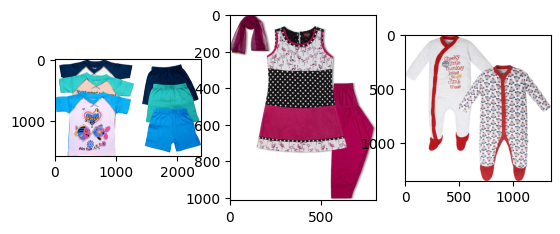

Beauty and Personal Care


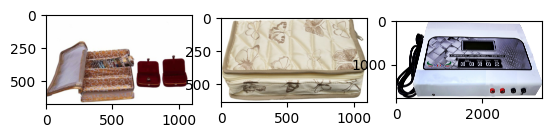

Computers


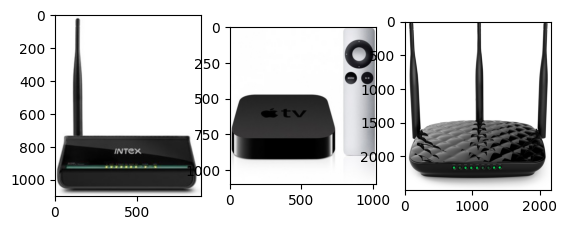

Home Decor & Festive Needs


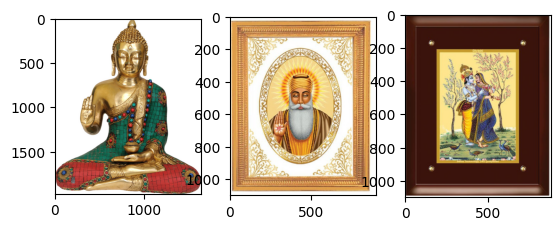

Home Furnishing


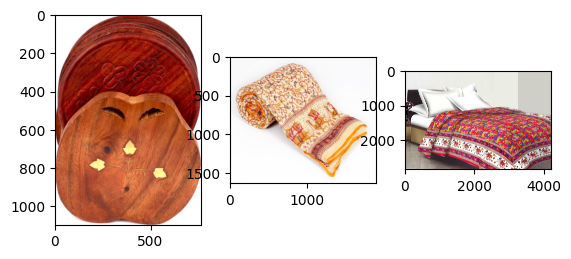

Kitchen & Dining


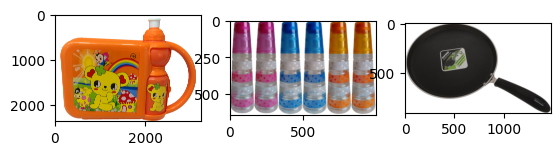

Watches


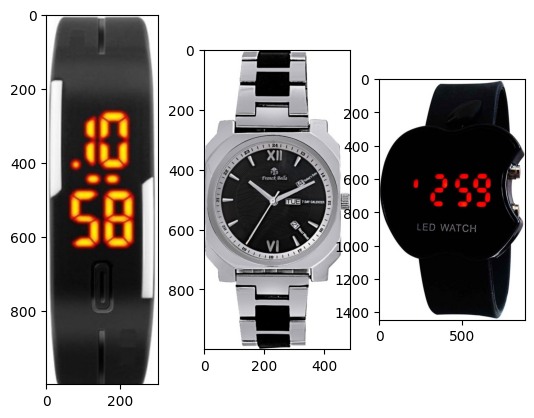

In [24]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

def list_fct(name):
    return data[data["label_name"].str.strip() == name]["image_path"].tolist()

list_labels = ["Baby Care", "Beauty and Personal Care", "Computers", "Home Decor & Festive Needs", "Home Furnishing", "Kitchen & Dining", "Watches"]

for name in list_labels:
    images = list_fct(name)
    print(name)
    num_images_to_show = min(3, len(images) - 10)  # Calculer le nombre d'images à afficher pour éviter les erreurs d'indexation
    if num_images_to_show > 0:  # Vérifier s'il y a suffisamment d'images pour afficher
        for i in range(num_images_to_show):
            plt.subplot(1, 3, i + 1)
            filename = images[i + 10]
            image = imread(filename)
            plt.imshow(image)
        plt.show()
    else:
        print(f"Not enough images for label {name} to display.")


In [25]:
data

,product_name,image_path,description,label_name,label
0,Elegance Polyester Multicolor Abstract Eyelet ...,data/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,data/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,data/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,data/Images/d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,data/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,data/Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,data/Images/fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,data/Images/5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,data/Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0


# Etude de faisabilité

## Création du modèle pré-entraîné

In [26]:
# chargement modèle pré entrainé (sur dataset ImageNet)
base_model = VGG16()

#création d'un nouveau modèle en omettant la dernière couche de classification finale
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

# affichage résumé du modèle (vérification de la configuration du modèle)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


## Création des features des images

In [27]:
# liste pour stocker image features
images_features = []

# bouclage pour chargement images et extraction caractéristiques de chaque image
i=0 
for image_file in data["image_path"] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224)) # chargement et redimensionnement image
    image = img_to_array(image) # conversion image en tableau numpy
    image = np.expand_dims(image, axis=0) # ajout dimension pour créer batch (requis)
    image = preprocess_input(image) #normalisation pixels
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500


/home/alexandre/anaconda3/envs/stabadenvP6/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


600
700
800
900


(910, 4096)

## Réduction dimension et analyse

### Réduction de dimension PCA

In [28]:
# import module
from sklearn import manifold, decomposition

# affichage forme tableau pour verif dimensions avant reduction
print(images_features.shape)
# initialisation pca (conservation de 99% variance)
pca = decomposition.PCA(n_components=0.99)
# application PCA sur caractéristiques extraites, transfor carac en nouvel espace dimension réduite (fit_transform en une seule étape)
feat_pca= pca.fit_transform(images_features)
# affichage tableau, voire nbr dimension conservées pour 99% variance
print(feat_pca.shape)

(910, 4096)
(910, 713)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [29]:
# module pour manifold et décomp
from sklearn import manifold, decomposition
# module pour mesurer temps execution
import time

# heure début exécution tSNE
temps1 = time.time()

# exécution du sme
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
# application tSNE sur données PCA pr obtenir representation 2D
X_tsne = tsne.fit_transform(feat_pca)

# heure fin exécution/calcul du temps
duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :             2.09 secondes


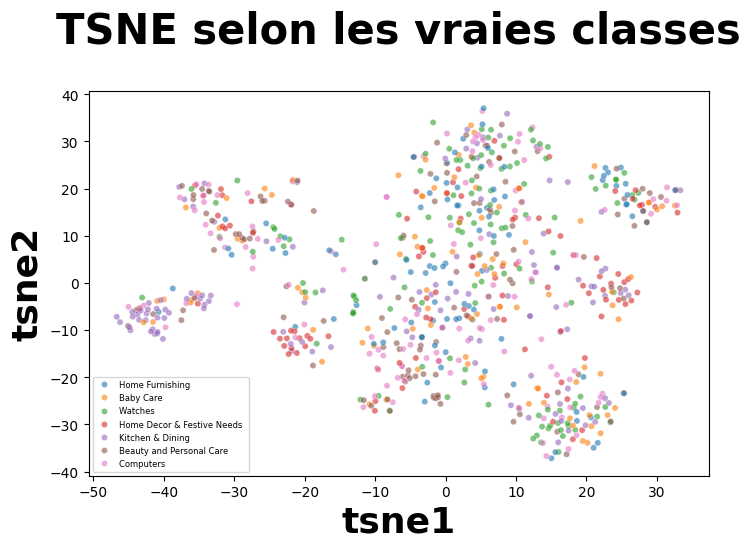

In [30]:
# création dataframe pour affichage avec coordonnées tsne
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
# ajout colonne pour etiquette
df_tsne["class"] = data["label_name"]

# configuration figure
plt.figure(figsize=(8,5))

# création graphique de dispersion
sns.scatterplot(
    x="tsne1", y="tsne2",# définition des colonnes à utiliser pour les axes
    hue="class", # coloriage des points selon class
    palette=sns.color_palette('tab10', n_colors=7), s=20, alpha=0.6, # palette avec 7 couleurs, points de taille 50, 0.6 de transparence
    data=df_tsne, # source des données
    legend="brief") # légende succinte

# titres et labels
plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold') # titre du graphique, paramètres de style
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold') # label axe x
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold') # label axe y
plt.legend(prop={'size': 6}) # style légende

# affichage graphique
plt.show()


### Création de clusters à partir du T-SNE et affichage des images selon clusters


In [31]:
# import module clustering et métriques
from sklearn import cluster, metrics

# config module cls (7 clusters, et 100 fois avec centroides initiaux diff, recherche celui avec meilleure inertie)
cls = cluster.KMeans(n_clusters=7, n_init=100)
# application kmeans aux données tSNE
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init=100)

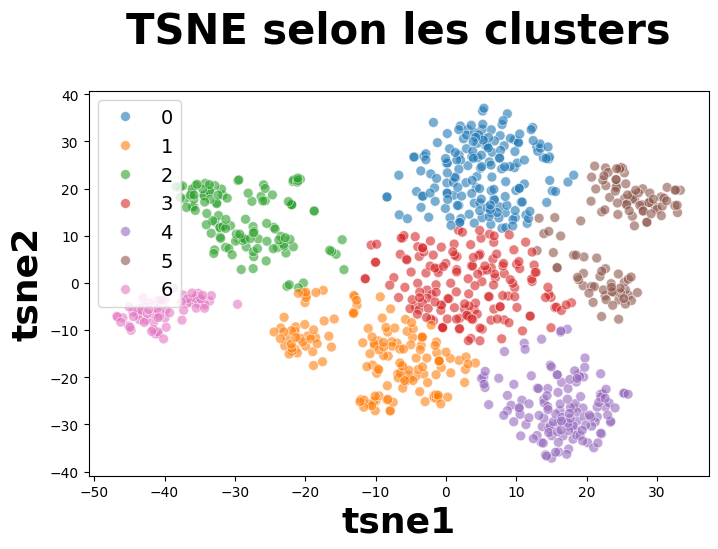

ARI :  0.43473609101437855


In [32]:
#Visualisation des clusters
df_tsne["cluster"] = cls.labels_ # ajout etiquettes

# config figure
plt.figure(figsize=(8,5))
# création graphique de dispersion
sns.scatterplot(
    x="tsne1", y="tsne2", # selection des données pour axes x et y
    hue="cluster", # coloriage des points en fonction cluter
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6, # palette 4 couleurs, , points taille 50, transparence 0.6
    data=df_tsne, # source des données pour graph
    legend="brief") # légende succinte

# titres et labels
plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold') # titre, paramètre de style
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold') # axe x
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold') # axe y
plt.legend(prop={'size': 14})  # style légende

# affichage graphique
plt.show()

# évaluation clustering
labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes

In [33]:
# mAtrice de confusion
conf_mat = metrics.confusion_matrix(labels, cls.labels_) # calcul la matrice de confusion
print(conf_mat)# affichage matrice de confusion

[[ 96   3   4  18   0   8   1]
 [  3   5 102  16   2   1   1]
 [  1  86   1  41   1   0   0]
 [  4   7   1  64   8  46   0]
 [ 68   0   0   6   0  56   0]
 [  0  43   8  16   1   0  62]
 [  0  10   0   1 119   0   0]]


In [34]:
# transformation de la matrice de confusion
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred) # calcul de la matrice de confusion
    
    corresp = np.argmax(conf_mat, axis=0) # trouve la correspondance des clusters
    print ("Correspondance des clusters : ", corresp)# affiche la correspondance
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame() # création d'un dataframe avec etiquettes reelles
    labels['y_pred'] = y_pred # ajoute etiquettes predites
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) # transforme etiquettes predites avec correspondance trouvée
    
    return labels['y_pred_transform'] # renvoie les etiquettes transformées

In [35]:
# application de la transformation et evaluation
cls_labels_transform = conf_mat_transform(labels, cls.labels_) # applique la fonction de transformation aux etiquettes des clusters
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform) # calcule la nouvelle matrice de confustion avec les etiquettes transformées
print(conf_mat) # affiche la matrice de confusion
print()
print(metrics.classification_report(labels, cls_labels_transform)) # affiche rapport de classification détaillé (avec précision, rappel et score F1 pour chaque classe)

Correspondance des clusters :  [0 2 1 3 6 4 5]
[[ 96   4   3  18   8   1   0]
 [  3 102   5  16   1   1   2]
 [  1   1  86  41   0   0   1]
 [  4   1   7  64  46   0   8]
 [ 68   0   0   6  56   0   0]
 [  0   8  43  16   0  62   1]
 [  0   0  10   1   0   0 119]]

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       130
           1       0.88      0.78      0.83       130
           2       0.56      0.66      0.61       130
           3       0.40      0.49      0.44       130
           4       0.50      0.43      0.46       130
           5       0.97      0.48      0.64       130
           6       0.91      0.92      0.91       130

    accuracy                           0.64       910
   macro avg       0.68      0.64      0.65       910
weighted avg       0.68      0.64      0.65       910



<Axes: >

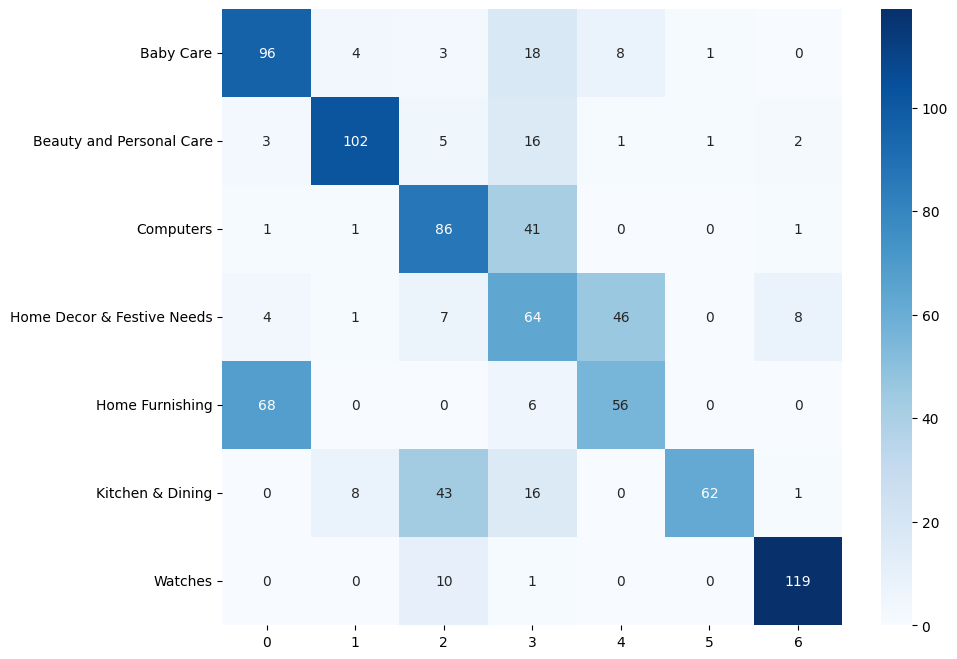

In [36]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"]) # création dataframe a partir matrice conf avec labels en index et les colonnes
plt.figure(figsize = (10,8)) # configuration de la taille de la figure
sns.heatmap(df_cm, annot=True, cmap="Blues",  fmt='d') # créé une jolie heatmap

## Classification supervisée
2 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images


### Création du modèle de classification

In [37]:

#Définition d'une fonction pour créer le modèle
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

### Approche préparation initiale des images

In [38]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Définit une fonction image_prep_fct qui prend un DataFrame data et prépare les images pour l'entraînement
def image_prep_fct(data):
    # Initialise une liste vide pour stocker les images préparées
    prepared_images = []
    # Boucle sur les chemins des images
    for image_num in range(len(data['image_path'])):  # Parcourt chaque chemin d'image dans la colonne image_path du DataFrame data
        # Charge l'image à partir du chemin data['image_path'][image_num] et redimensionne l'image
        img = load_img(data['image_path'].iloc[image_num], target_size=(224, 224))
        # Convertit l'image en un tableau numpy
        img = img_to_array(img)
        # Reshape le tableau pour s'assurer qu'il a la forme correcte (224, 224, 3)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        # Prétraite l'image pour correspondre aux exigences du modèle VGG16
        img = preprocess_input(img)
        # Ajoute l'image prétraitée à la liste prepared_images
        prepared_images.append(img)
    # Convertit la liste d'images prétraitées en un tableau numpy
    prepared_images_np = np.array(prepared_images)
    return prepared_images_np

# Prépare les images d'entraînement en appelant image_prep_fct avec le DataFrame data
images_np = image_prep_fct(data)
print(images_np.shape)  # Affiche la forme du tableau numpy des images d'entraînement

# Prépare les images de test en appelant image_prep_fct avec le DataFrame data_test
images_np_test = image_prep_fct(data_test)
print(images_np_test.shape)  # Affiche la forme du tableau numpy des images de test


/home/alexandre/anaconda3/envs/stabadenvP6/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(910, 224, 224, 3)
(140, 224, 224, 3)


In [39]:
#Assigne le tableau numpy des images préparées d'entraînement à la variable X
X = images_np

#Utilise to_categorical de Keras pour convertir les labels des données d'entraînement en format one-hot encoding.
# data['label'] : Les labels des données d'entraînement.
y = to_categorical(data['label']) 


X_test = images_np_test #Assigne le tableau numpy des images préparées de test à la variable X_test.

#Utilise to_categorical de Keras pour convertir les labels des données de test en format one-hot encoding.
#data_test['label'] : Les labels des données de test.
y_test = to_categorical(data_test['label'])

# Affiche les labels des données d'entraînement transformés en one-hot encoding.
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [40]:
#Division des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# l'instruction stratify=y Assure que la répartition des classes dans les ensembles d'entraînement et de validation est proportionnelle à leur répartition dans les données originales


#Affichage de la forme des données d'entraînement
X_train.shape

(682, 224, 224, 3)

In [41]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Création du modèle
# On omet la spécification du GPU puisque je n'en ai pas
model1 = create_model_fct()  # Appelle la fonction create_model_fct pour créer et compiler le modèle model1.

# Création du callback
model1_save_path1 = "./model1_best_weights.keras"  # Spécifie le chemin où les meilleurs poids du modèle seront sauvegardés.

# monitor='val_loss' : Surveille la perte de validation.
# verbose=1 : Affiche des messages lors de la sauvegarde des poids.
# save_best_only=True : Sauvegarde les poids seulement si la perte de validation s'améliore.
# mode='min' : Cherche à minimiser la perte de validation
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# monitor='val_loss' : Surveille la perte de validation.
# mode='min' : Cherche à minimiser la perte de validation.
# verbose=1 : Affiche des messages lorsque l'entraînement s'arrête.
# patience=5 : Arrête l'entraînement si la perte de validation ne s'améliore pas pendant 5 epochs.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Crée une liste de callbacks contenant le checkpoint et l'arrêt précoce.
callbacks_list = [checkpoint, es]

# configurer TensorFlow pour utiliser le CPU explicitement
tf.config.set_visible_devices([], 'GPU')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [42]:
import tensorflow as tf

# Configurer TensorFlow pour utiliser uniquement le CPU
tf.config.set_visible_devices([], 'GPU')

# Entraîner sur les données d'entraînement (X_train, y_train)
# On ne spécifie pas `with tf.device('/gpu:0')`

# X_train, y_train : Données d'entraînement.
# epochs=50 : Nombre maximum d'époques pour l'entraînement.
# batch_size=64 : Taille des lots utilisés pendant l'entraînement.
# callbacks=callbacks_list : Liste des callbacks pour sauvegarder les meilleurs poids et arrêter l'entraînement prématurément si nécessaire.
# validation_data=(X_val, y_val) : Données de validation pour évaluer le modèle à chaque époque.
# verbose=1 : Affiche des messages détaillés pendant l'entraînement.

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                      callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3143 - loss: 8.0723
Epoch 1: val_loss improved from inf to 1.29035, saving model to ./model1_best_weights.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 78s 7s/step - accuracy: 0.3261 - loss: 7.8480 - val_accuracy: 0.7544 - val_loss: 1.2903
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7031 - loss: 1.7908
Epoch 2: val_loss improved from 1.29035 to 1.21310, saving model to ./model1_best_weights.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 77s 7s/step - accuracy: 0.7027 - loss: 1.7955 - val_accuracy: 0.8026 - val_loss: 1.2131
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7348 - loss: 1.3047
Epoch 3: val_loss improved from 1.21310 to 0.99865, saving model to ./model1_best_weights.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 77s 7s/step - accuracy: 0.7341 - loss: 1.3017 - val_accuracy: 0.8026 - val_loss: 0.9986
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7740 - loss: 0.9949
Epoch 4: val_loss improved from 0.99865

In [43]:
# Score du dernier epoch

#Évaluation du modèle sur les données d'entraînement :
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy)) # Affiche la précision sur les données d'entraînement avec quatre décimales.
print()

#Évaluation du modèle sur les données de validation :
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.9950 - loss: 0.0238
Training Accuracy: 0.9941

8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8350 - loss: 1.0001
Validation Accuracy:  0.8158


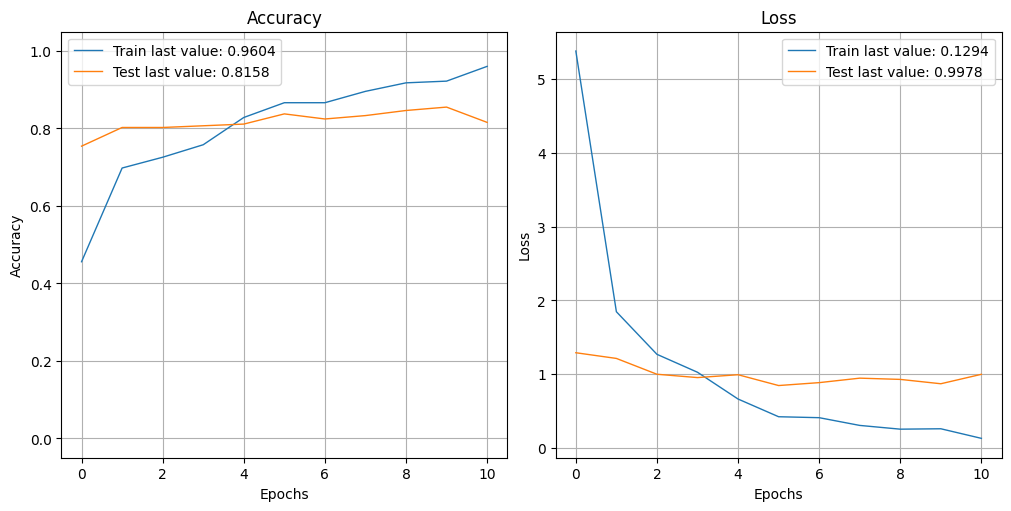

In [44]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

#Affichage de l'historique de l'entraînement :
show_history(history1)

#Enregistrement et affichage des graphiques de l'historique de l'entraînement :
plot_history(history1, path="standard.png")
plt.close()

In [45]:
#Conversion des labels de validation de one-hot encoding en labels numériques :
y_val_num = np.argmax(y_val, axis=1)

#Prédiction des labels de validation :
y_val_pred = np.argmax(model1.predict(X_val), axis=1)

#Réaffectation des labels de validation en labels numériques :
y_val_num = np.argmax(y_val, axis=1)

#Affichage des labels de validation réels et prédits :
print(y_val_num)
print()
print(y_val_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
[4 0 6 5 5 4 2 2 0 6 0 3 0 5 0 6 3 2 3 3 3 1 1 2 3 3 3 1 5 0 5 4 1 1 5 2 2
 5 5 3 6 2 0 2 1 3 6 5 4 4 3 2 2 6 3 1 2 6 4 1 2 1 4 5 0 0 2 4 4 6 5 2 2 2
 0 2 4 6 2 6 6 5 5 5 5 3 5 3 6 6 4 5 6 0 3 1 0 3 6 0 0 0 3 0 6 1 2 4 4 5 1
 6 4 0 3 6 2 3 2 3 0 6 1 3 2 2 6 4 1 2 3 0 2 0 3 6 6 5 3 0 3 1 1 1 4 4 6 0
 4 0 5 4 4 3 4 0 3 6 3 1 5 1 1 6 4 6 1 4 2 5 2 1 2 2 1 6 6 5 1 0 6 1 2 3 1
 1 4 0 3 6 1 5 1 5 4 4 1 4 2 6 5 4 0 3 0 5 4 1 3 4 5 5 5 3 4 0 0 6 0 0 5 5
 0 2 4 1 2 4]

[4 4 6 5 5 3 2 2 0 6 0 3 0 5 0 6 3 2 3 3 5 1 1 2 3 3 3 2 5 4 5 4 1 1 5 2 2
 5 5 3 6 4 2 2 1 3 2 5 4 4 3 2 2 6 3 1 2 6 4 1 2 1 4 5 0 0 2 2 4 6 5 2 2 3
 4 5 0 6 2 6 6 5 5 5 5 3 5 3 6 2 4 5 6 0 3 2 0 3 6 0 0 0 3 0 5 1 2 1 4 5 1
 6 4 2 5 6 2 3 2 3 0 6 1 5 2 2 6 4 1 2 3 4 2 1 3 6 6 5 1 0 3 1 6 1 4 4 6 0
 4 0 5 4 0 3 1 0 3 6 3 1 5 1 5 6 4 6 1 0 2 5 2 1 2 3 1 6 6 5 1 3 6 5 2 3 1
 2 0 1 3 6 1 5 5 5 4 3 1 4 2 6 5 4 4 6 0 5 4 3 3 4 5 5 5 3 0 0 0 6 0 4 5 5
 0 2 4 6 2 4]


In [46]:
#Calcul de la matrice de confusion :

#y_val_num : Les étiquettes réelles des données de validation en format numérique.
#y_val_pred : Les étiquettes prédites par le modèle pour les données de validation en format numérique
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)


#Affichage de la matrice de confusion :
print(conf_mat)

[[22  2  2  1  6  0  0]
 [ 0 23  3  1  0  3  2]
 [ 0  0 29  2  1  1  0]
 [ 0  1  0 28  0  3  1]
 [ 5  2  1  2 23  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  0  2  0  0  1 29]]


In [47]:
#Transformation des étiquettes prédites :
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)

#Calcul de la matrice de confusion avec les étiquettes transformées                
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)

#Affichage de la matrice de confusion :
print(conf_mat)
print()
                                          
#Calcul et affichage du rapport de classification :
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[22  2  2  1  6  0  0]
 [ 0 23  3  1  0  3  2]
 [ 0  0 29  2  1  1  0]
 [ 0  1  0 28  0  3  1]
 [ 5  2  1  2 23  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  0  2  0  0  1 29]]

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.82      0.72      0.77        32
           2       0.78      0.88      0.83        33
           3       0.82      0.85      0.84        33
           4       0.77      0.70      0.73        33
           5       0.80      1.00      0.89        32
           6       0.91      0.91      0.91        32

    accuracy                           0.82       228
   macro avg       0.82      0.82      0.81       228
weighted avg       0.82      0.82      0.81       228



<Axes: >

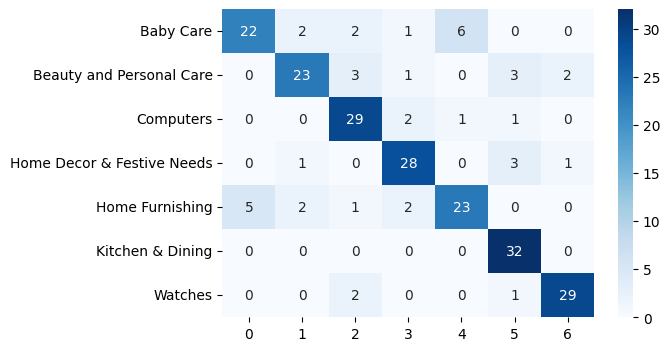

In [48]:
#Création d'un DataFrame pour la matrice de confusion :
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])

#Création de la figure pour la heatmap :
plt.figure(figsize = (6,4))

#Affichage de la heatmap de la matrice de confusion :
sns.heatmap(df_cm, annot=True, cmap="Blues")

### Approche ImageDatagenerator avec data augmentation

CF https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow (noté désormais comme "deprecated", incite à utiiser l'approche suivante)

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
# Pour mélanger les images, classées initalement par classe
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [51]:
batch_size = 32

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='',
                                x_col='image_path', y_col='label_name',
                                weight_col=None, target_size=(224, 224),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

In [52]:
datagen_train = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.25,
    preprocessing_function=preprocess_input)

train_flow = data_flow_fct(data, datagen_train, data_type='training')
val_flow = data_flow_fct(data, datagen_train, data_type='validation')

datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

test_flow = data_flow_fct(data_test, datagen_test, data_type=None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

Found 683 validated image filenames belonging to 7 classes.
Found 227 validated image filenames belonging to 7 classes.
Found 140 validated image filenames belonging to 7 classes.


In [53]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Configurer TensorFlow pour utiliser uniquement le CPU
tf.config.set_visible_devices([], 'GPU')

# Création du modèle (sans spécifier le GPU)
model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.keras"  # Utilisez l'extension .keras comme requis
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [54]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [55]:
# Entraîner sur les données d'entraînement (train_flow, val_flow)
history2 = model2.fit(train_flow,
                      validation_data=val_flow,
                      batch_size=batch_size, epochs=50, 
                      callbacks=callbacks_list, verbose=1)

Epoch 1/50


/home/alexandre/anaconda3/envs/stabadenvP6/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/22 ━━━━━━━━━━━━━━━━━━━━ 2:19 7s/step - accuracy: 0.0938 - loss: 13.6617

/home/alexandre/anaconda3/envs/stabadenvP6/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3228 - loss: 6.7830
Epoch 1: val_loss improved from inf to 1.41568, saving model to ./model2_best_weights.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.3281 - loss: 6.6863 - val_accuracy: 0.6872 - val_loss: 1.4157
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6571 - loss: 1.7893
Epoch 2: val_loss improved from 1.41568 to 1.03244, saving model to ./model2_best_weights.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.6577 - loss: 1.7850 - val_accuracy: 0.7930 - val_loss: 1.0324
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7073 - loss: 1.1653
Epoch 3: val_loss improved from 1.03244 to 0.80131, saving model to ./model2_best_weights.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.7077 - loss: 1.1686 - val_accuracy: 0.8282 - val_loss: 0.8013
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7643 - loss: 0.9171
Epoch 4: val_loss did not improve from 0.80131
22/

In [56]:
# Score du dernier epoch

loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

22/22 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.9721 - loss: 0.0853
Training Accuracy   : 0.9649

8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8734 - loss: 0.6208
Validation Accuracy :  0.8546


In [57]:
# Score de l'epoch optimal

model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8326
Test Accuracy       :  0.7929


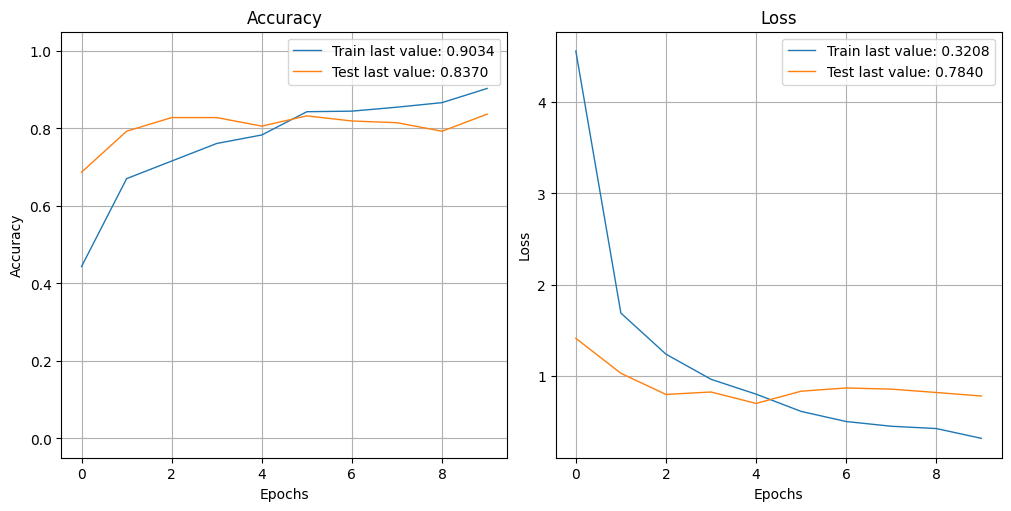

In [58]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history2)
plot_history(history2, path="standard.png")
plt.close()

In [59]:
#Conversion des labels de validation de one-hot encoding en labels numériques :
y_val_num = np.argmax(y_val, axis=1)

#Prédiction des labels de validation :
y_val_pred = np.argmax(model2.predict(X_val), axis=1)

#Réaffectation des labels de validation en labels numériques :
y_val_num = np.argmax(y_val, axis=1)

#Affichage des labels de validation réels et prédits :
print(y_val_num)
print()
print(y_val_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
[4 0 6 5 5 4 2 2 0 6 0 3 0 5 0 6 3 2 3 3 3 1 1 2 3 3 3 1 5 0 5 4 1 1 5 2 2
 5 5 3 6 2 0 2 1 3 6 5 4 4 3 2 2 6 3 1 2 6 4 1 2 1 4 5 0 0 2 4 4 6 5 2 2 2
 0 2 4 6 2 6 6 5 5 5 5 3 5 3 6 6 4 5 6 0 3 1 0 3 6 0 0 0 3 0 6 1 2 4 4 5 1
 6 4 0 3 6 2 3 2 3 0 6 1 3 2 2 6 4 1 2 3 0 2 0 3 6 6 5 3 0 3 1 1 1 4 4 6 0
 4 0 5 4 4 3 4 0 3 6 3 1 5 1 1 6 4 6 1 4 2 5 2 1 2 2 1 6 6 5 1 0 6 1 2 3 1
 1 4 0 3 6 1 5 1 5 4 4 1 4 2 6 5 4 0 3 0 5 4 1 3 4 5 5 5 3 4 0 0 6 0 0 5 5
 0 2 4 1 2 4]

[4 4 6 5 5 4 2 2 0 6 0 3 0 5 0 6 3 2 3 3 3 1 1 2 3 3 3 2 5 0 5 4 1 1 5 2 2
 5 5 3 6 0 1 2 1 3 6 5 4 4 3 2 2 6 3 1 2 6 4 1 2 1 4 5 0 0 2 4 4 6 5 2 2 3
 0 2 4 6 2 6 6 5 5 5 5 3 5 3 6 6 4 5 6 0 3 3 0 3 6 0 0 0 3 0 5 1 2 4 4 5 1
 6 4 0 3 6 2 3 2 3 0 6 1 3 5 2 6 4 1 2 3 0 2 1 3 6 6 5 3 0 3 1 5 1 4 4 6 0
 4 0 5 4 4 3 4 0 3 6 3 1 5 5 1 6 4 6 1 0 2 5 2 1 2 3 3 6 6 5 1 4 6 5 2 3 1
 5 0 1 3 6 1 5 1 5 4 4 1 4 2 6 5 4 0 5 0 5 4 1 3 4 5 5 5 4 4 0 0 6 0 0 5 5
 0 1 4 2 2 4]


In [60]:
#Transformation des étiquettes prédites :
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)

#Calcul de la matrice de confusion avec les étiquettes transformées                
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)

#Affichage de la matrice de confusion :
print(conf_mat)
print()
                                          
#Calcul et affichage du rapport de classification :
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[28  3  0  0  2  0  0]
 [ 0 24  2  2  0  4  0]
 [ 1  1 28  2  0  1  0]
 [ 0  0  0 31  1  1  0]
 [ 2  0  0  0 31  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  0  0  0  0  1 31]]

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.86      0.75      0.80        32
           2       0.93      0.85      0.89        33
           3       0.89      0.94      0.91        33
           4       0.91      0.94      0.93        33
           5       0.82      1.00      0.90        32
           6       1.00      0.97      0.98        32

    accuracy                           0.90       228
   macro avg       0.90      0.90      0.90       228
weighted avg       0.90      0.90      0.90       228



<Axes: >

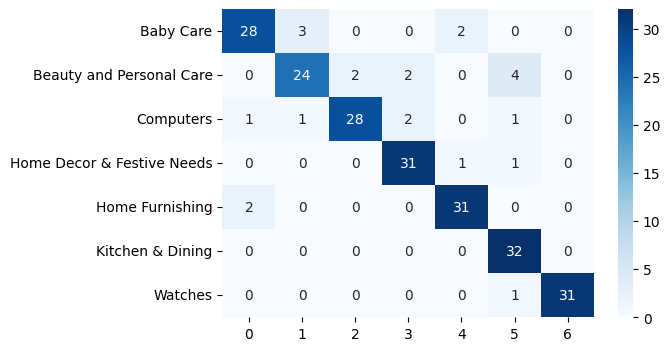

In [61]:
#Création d'un DataFrame pour la matrice de confusion :
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])

#Création de la figure pour la heatmap :
plt.figure(figsize = (6,4))

#Affichage de la heatmap de la matrice de confusion :
sns.heatmap(df_cm, annot=True, cmap="Blues")